#**Customer Churn Project**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df['SeniorCitizen'].nunique()

2

In [9]:
df['SeniorCitizen'].unique()

array([0, 1])

In [10]:
#df['TotalCharges'] = df['TotalCharges'].astype(float)

#OR
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [11]:
df['TotalCharges'].dtype

dtype('float64')

In [12]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
df.dropna(inplace = True)

In [16]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
col = list(df.columns)

for i in col:
  if df[i].dtype == 'object':
    print(i, ':', df[i].unique())    #OR  -->  print(f "{i} : {df[i].unique()}")


customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


####**Extract the 5th column and & store it in 'customer_5'**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [20]:
customer_5 = df['Dependents']  #Store in new variable
customer_5.head()

,Dependents
0,No
1,No
2,No
3,No
4,No


In [21]:
df.loc[:, ['customerID', 'gender']].head() #df.loc[row: col]

,customerID,gender
0,7590-VHVEG,Female
1,5575-GNVDE,Male
2,3668-QPYBK,Male
3,7795-CFOCW,Male
4,9237-HQITU,Female


In [22]:
df.iloc[:,:2]         #Index location use --> df.iloc[row: col]

,customerID,gender
0,7590-VHVEG,Female
1,5575-GNVDE,Male
2,3668-QPYBK,Male
3,7795-CFOCW,Male
4,9237-HQITU,Female
...,...,...
7038,6840-RESVB,Male
7039,2234-XADUH,Female
7040,4801-JZAZL,Female
7041,8361-LTMKD,Male


####**Extract the 15th column and store it in customer_15**

In [23]:
customer_15 = df.iloc[:, 14]
customer_15

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,No
7041,No


####**Extract all the male senior citizens whose Payment Method is Electronics. Check and store the result in 'senior_male_electronics'**

In [24]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [25]:
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


####**Extract all those customers whose tenure greater the 70 months or their Monthly charges is more than $100. And store it in customer_total_tenure.**

In [26]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [27]:
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


####**Extract all the customers whose Contract is of two years payment method is Mailed check & The value of churn is "Yes". And store the result in two_mail_yes.**

In [28]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [29]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [30]:
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


####**Extract 333 random record from the customer_churn_dataset. And store then into result called customer_333.**

In [31]:
customer_333 = df.sample(n = 333)  # n = number of data you want to fetch.
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4845,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),39.40,825.40,No
1834,8080-DDEMJ,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.10,45.10,Yes
3460,2669-OIDSD,Female,0,Yes,No,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.05,4834.00,No
3261,2378-YIZKA,Female,0,Yes,Yes,68,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.00,5607.75,No
3127,1432-FPAXX,Female,0,No,No,29,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,30.60,856.35,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,5003-XZWWO,Male,0,Yes,No,71,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.20,5956.85,No
1622,2361-UPSND,Female,0,Yes,No,46,Yes,No,DSL,Yes,...,No,Yes,No,Yes,One year,No,Mailed check,70.60,3231.05,No
6913,8213-TAZPM,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),108.75,7493.05,No
5635,2087-QAREY,Female,0,Yes,No,22,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,54.70,1178.75,No


####**Get the count of different levels from 'Churn' column.**

In [32]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


##**Visualization**

**Build a bar plot for 'InternetService' column.**

(i).  Set x-axis label to 'Categories of Internet Service'

(ii). Set y-axis label to 'Count of categories'

(iii). Set the title of plot to be 'Distribution of Internet Service'

(iv). Set the color of bars to be 'orange'

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
count_of_categories = df['InternetService'].value_counts()
count_of_categories

#Index = InternetService
#Value = Count

,count
InternetService,
Fiber optic,3096
DSL,2416
No,1520


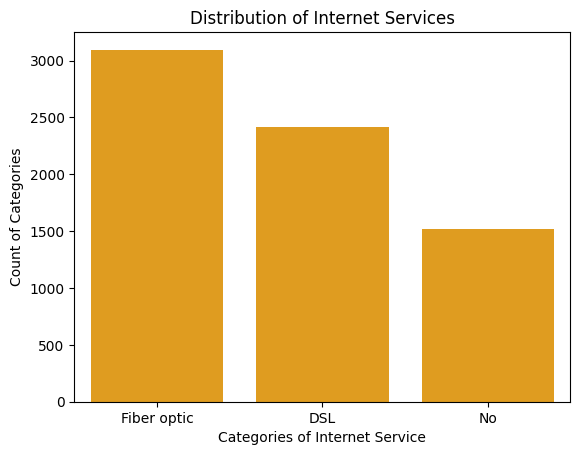

In [36]:
sns.barplot(x= (count_of_categories).index, y = (count_of_categories).values, color = 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Services')
plt.show()

####**Build a Histogram for 'tenure' column.**

(i). Set the number of bins to be 30.

(ii). Set the color of bins to be green.

(iii). Assign the title 'Distribution of Tenure'.

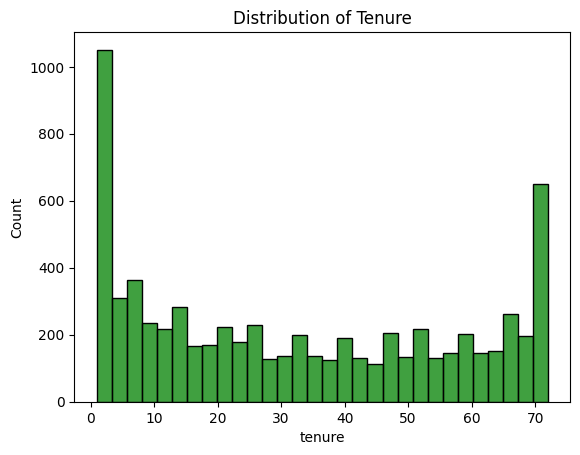

In [37]:
sns.histplot(df['tenure'], bins = 30, color = 'green')
plt.title('Distribution of Tenure')
plt.show()

####**Build scatter-plot between 'MonthlyCharges' & 'tenure'.**

- Map 'MonthlyCharges' to y-axis.
- Tenure to the x-axis.

(i). Assign the point a color of 'brown'.

(ii). Ste the x-axis label to 'Tenure of Customer'

(iii). Set y-axis label to 'Monthly Charges of Customer'

(iv). Set the title of 'Tenure vs Monthly Charges'

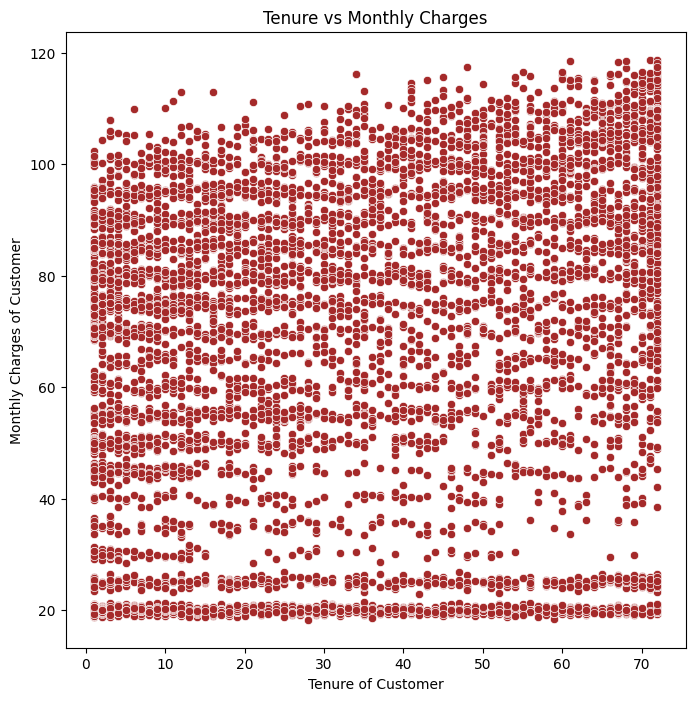

In [38]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'tenure', y = 'MonthlyCharges', data = df, color = 'brown')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

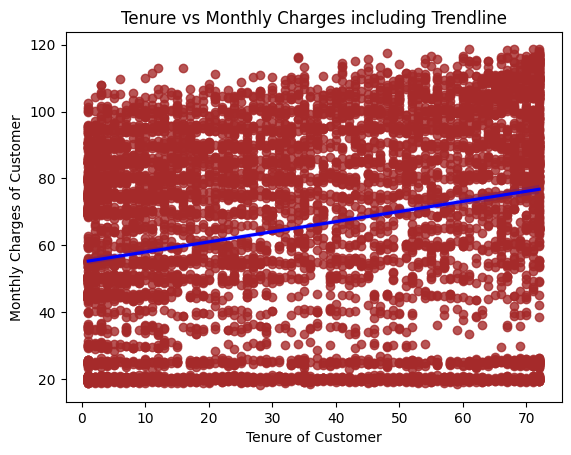

In [39]:
#Relationship Plot (Scatter + Line Plot)
#line_kws = {'color' : 'pink'} ---> Responsible for changing the color of TrendLine.

sns.regplot(x='tenure', y='MonthlyCharges', data=df, color='brown', line_kws = {'color' : 'blue'})
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges including Trendline')
plt.show()


####**Build a Box Plot between 'tenure' & 'Contract'. Map 'Contract' at x-axis and 'tenure at y-axis.**

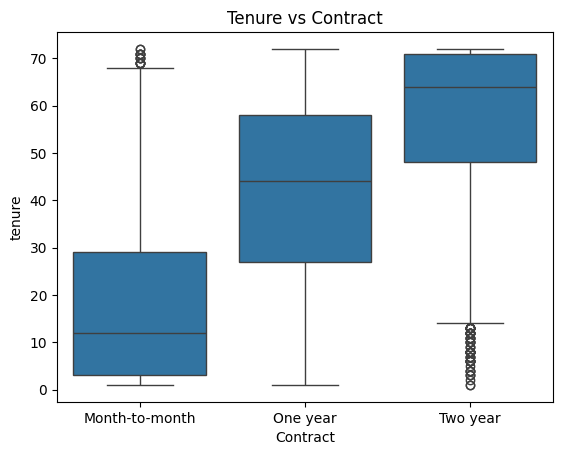

In [40]:
sns.boxplot(x = 'Contract', y = 'tenure', data = df)
plt.title('Tenure vs Contract')
plt.show()

#**Model Building**

###**1. Linear Regression**

Build a simple linear regression model in which the **Dependent variable** is *'MonthlyCharges'* and the **Independent Variable** is *'tenure'*.

(i). Divide the datset into train and test in 70:30 ration.

(ii). Build the model of train set and predict the values on the test set.

(iii). After predicting the values, Find the **Root Mean Square Error.**

(iv). Find out the error in prediction & store the result in 'error'.

(v). Find Root Mean Square Error.

In [41]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [42]:
#Check the Datatype of Columns
print(df['MonthlyCharges'].dtype)
print(df['tenure'].dtype)

float64
int64


In [43]:
x = df.loc[:, ['tenure']]
y = df.loc[:, ['MonthlyCharges']]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 45)

In [45]:
model = LinearRegression()

In [46]:
model.fit(x_train, y_train)

LinearRegression()

In [47]:
pred = model.predict(x_test)
pred

array([[75.31456303],
       [56.33377012],
       [75.89858742],
       ...,
       [57.20980672],
       [75.31456303],
       [59.25389211]])

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

#Find Accuracy score
r2_score = r2_score(y_test, pred)
r2_score

0.06902510461706246

In [49]:
#Mean Square Error

mse = mean_squared_error(y_test, pred)
mse

853.8928771266882

In [50]:
 #Root Mean Square Error

 rmse = np.sqrt(mse)
 rmse

np.float64(29.22144550029461)

In [51]:
# y_test - pred ---> error for each value
# 100 - r2_score ---> %age of error

error = y_test - pred
error

,MonthlyCharges
2287,33.085437
2087,-22.683770
2308,28.751413
1960,23.797876
4634,-36.999746
...,...
6237,14.492266
1034,5.951413
6628,36.840193
6101,34.935437
